#LIBERARIES


In [154]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
#---------------------------------------------------------------------------------------------->GRID_SEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->SCORE_FOR_REGRESSION
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
#---------------------------------------------------------------------------------------------->REGRESSION_MODELS(LinearRegression)
from sklearn.linear_model import LinearRegression,RANSACRegressor
import missingno as msng
#---------------------------------------------------------------------------------------------->statsmodels(PERFORM_LINEAR_REGRESSION)
import statsmodels.api as sm
#---------------------------------------------------------------------------------------------->EXCEPTION_WARNING
import warnings
warnings.filterwarnings("ignore")
#---------------------------------------------------------------------------------------------->REGRESSION_MODELS
from sklearn import linear_model
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE #recursive feature elimination
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#LOAD_DATA

In [119]:
data = pd.read_csv("/content/prices_clean.csv")
data

,year,make,model,price
0,2023,Honda,Elevate,14530.0
1,2023,Honda,e,37140.0
2,2023,Honda,e Advance,37140.0
3,2023,Honda,Pilot Elite AWD,52030.0
4,2023,Honda,Pilot EX-L 8-Passenger AWD,42310.0
...,...,...,...,...
1165,2023,Tesla,S Performance,104990.0
1166,2023,Tesla,X Performance,120990.0
1167,2023,Tesla,Model 3 Long Range,51990.0
1168,2023,Tesla,Model X Plaid,119990.0


#EDA

In [120]:
data['make'].value_counts()

Hyundai         46
Nissan          44
Bentley         44
Ford            43
Toyota          40
Jeep            39
Infiniti        37
Aston Martin    36
Genesis         35
Lincoln         35
Maserati        35
Honda           34
Porsche         33
Dodge           32
Tesla           32
Jaguar          32
Buick           31
Lamborghini     30
Volkswagen      30
Acura           30
KIA             28
Mazda           28
Land Rover      28
Alfa Romeo      27
Cadillac        27
Chrysler        27
Mercedes        27
Audi            27
MINI            26
Lexus           26
Volvo           25
GMC             23
BMW             23
Subaru          23
Ferrari         20
Chevrolet       20
Mclaren         16
Fiat            13
Rolls Royce     12
Bugatti          6
Name: make, dtype: int64

In [121]:
data['model'].value_counts()

DBR22                    2
Vantage Coupe            2
Palisade Limited AWD     2
812 Superfast            1
Purosangue               1
                        ..
911 Turbo S Cabriolet    1
Panamera                 1
Panamera 4               1
Macan                    1
Model X Long Range       1
Name: model, Length: 1167, dtype: int64

In [122]:
data['year'].value_counts()

2023    1170
Name: year, dtype: int64

In [123]:
data.drop(['year'],axis=1,inplace=True)
data

,make,model,price
0,Honda,Elevate,14530.0
1,Honda,e,37140.0
2,Honda,e Advance,37140.0
3,Honda,Pilot Elite AWD,52030.0
4,Honda,Pilot EX-L 8-Passenger AWD,42310.0
...,...,...,...
1165,Tesla,S Performance,104990.0
1166,Tesla,X Performance,120990.0
1167,Tesla,Model 3 Long Range,51990.0
1168,Tesla,Model X Plaid,119990.0


In [124]:
df_dummies = pd.get_dummies(data, columns=['model', 'make']) # if multi features
df_concat = pd.concat([data, df_dummies], axis=1)
df_concat.drop(df_concat.iloc[:,0:2],axis = 1,inplace=True)

In [125]:
df_concat = df_concat.T.drop_duplicates().T
df_concat

,price,model_2,model_296 GTB,model_296 GTB Assetto Fiorano,model_296 GTB Assetto Fiorano Coupe,model_296 GTB Coupe,model_296 GTS,model_3 Hatchback,model_3 Hatchback 2.5 S Carbon Edition,model_3 Hatchback 2.5 S Premium,...,make_Mclaren,make_Mercedes,make_Nissan,make_Porsche,make_Rolls Royce,make_Subaru,make_Tesla,make_Toyota,make_Volkswagen,make_Volvo
0,14530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52030.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,104990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1166,120990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1167,51990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1168,119990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: xlabel='price', ylabel='count'>

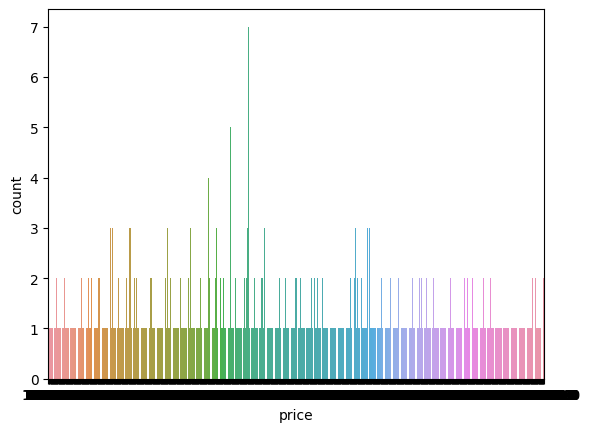

In [126]:
sns.countplot(x='price',data=df_concat)

#SPLITTING_DATA

In [127]:
x=df_concat.loc[:,df_concat.columns != 'price']
y=df_concat['price']

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid =train_test_split(x_train,y_train,test_size=.1, random_state=42)

#GRIDE_SEARCH_LINEAR_REGRESSION

In [129]:
param_grid_L={'fit_intercept': [True, False], 'positive': [True, False]}

In [130]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid= param_grid_L)
grid_result_L= G_L_REG.fit(x_train,y_train)
print(grid_result_L.best_params_)

{'fit_intercept': False, 'positive': False}


In [131]:
y_pred_test_L=grid_result_L.predict(x_test)
score_test_L=r2_score(y_test,y_pred_test_L)*100
print("score_test_L_V for our test dataset with tuning is : {:.2f}%".format(score_test_L))

score_test_L_V for our test dataset with tuning is : 67.71%


#GRIDE_SEARCH_XGBOOST

In [132]:
XGB_REG_mode=XGBRegressor()

In [133]:
param_grid_XGB={
 'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
}

In [134]:
grid_search_XGB=GridSearchCV(
    estimator=XGB_REG_mode.fit(x_train,y_train),
    param_grid=param_grid_XGB,
    scoring = 'recall',
    n_jobs = -1,
    verbose=True
)

In [135]:
grid_result_RESULT_XGB=grid_search_XGB.fit(x_train,y_train)
print(grid_result_RESULT_XGB.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [136]:
y_pred_test_XGB=grid_result_RESULT_XGB.predict(x_test)
score_test_XGB=r2_score(y_test,y_pred_test_XGB)*100
print("score_test_XGB for our test dataset with tuning is : {:.2f}%".format(score_test_XGB))

score_test_XGB for our test dataset with tuning is : 62.64%


#GRID_SEARCH_RIDGE

In [137]:
Ridge_model=Ridge(alpha=.5)

In [138]:
params_grid_RIDGE={
    "alpha": 10.0 ** np.arange(-5, 6)}
grid_search_RIDGE=GridSearchCV(estimator=Ridge_model, param_grid=params_grid_RIDGE)
grid_search_RESULT_RIDGE=grid_search_RIDGE.fit(x_train,y_train)

In [139]:
y_pred_test_RIDGE=grid_search_RESULT_RIDGE.predict(x_test)
score_test_RIDGE=r2_score(y_test,y_pred_test_RIDGE)*100
print("score_test_RIDGE for our test dataset with tuning is : {:.2f}%".format(score_test_RIDGE))

score_test_RIDGE for our test dataset with tuning is : 67.77%


#GRID_SEARCH_LASSO

In [140]:
Lasso_model=Lasso(alpha=.4)

In [141]:
params_grid_LASSO={
    "alpha": 10.0 ** np.arange(-5, 6)}
grid_search_LASSO=GridSearchCV(estimator=Lasso_model, param_grid=params_grid_LASSO)
grid_search_RESULT_LASSO=grid_search_LASSO.fit(x_train,y_train)

In [142]:
y_pred_test_LASSO=grid_search_RESULT_LASSO.predict(x_test)
score_test_LASSO=r2_score(y_test,y_pred_test_LASSO)*100
print("score_test_LASSO for our test dataset with tuning is : {:.2f}%".format(score_test_LASSO))

score_test_LASSO for our test dataset with tuning is : 61.70%


#GRID_SEARCH_ELASTIC_NET

In [143]:
ELASTIC_REG= ElasticNet()

In [144]:
param_grid_ELASTIC_REG={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
grid_search_ELASTIC_REG=GridSearchCV(estimator=ElasticNet(),
                       param_grid=param_grid_ELASTIC_REG,
                       return_train_score=True,verbose=1)
grid_search_RESULTELASTIC_REG=grid_search_ELASTIC_REG.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [145]:
y_pred_test_ELASTIC_REG=grid_search_RESULTELASTIC_REG.predict(x_test)
score_test_ELASTIC_REG=r2_score(y_test,y_pred_test_ELASTIC_REG)*100
print("score_test_ELASTIC_REG for our test dataset with tuning is : {:.2f}%".format(score_test_ELASTIC_REG))

score_test_ELASTIC_REG for our test dataset with tuning is : 67.76%


#ExtraTreesRegressor

In [146]:
EXTRA_REG_TREE= ExtraTreesRegressor()

In [147]:
grid_search_EXTRA_REG_TREE=EXTRA_REG_TREE.fit(x_train,y_train)

In [148]:
EXTRA_REG_TREE.feature_importances_

array([1.00528478e-06, 0.00000000e+00, 5.71762677e-07, ...,
       7.83644469e-14, 7.11511964e-06, 1.70635275e-05])

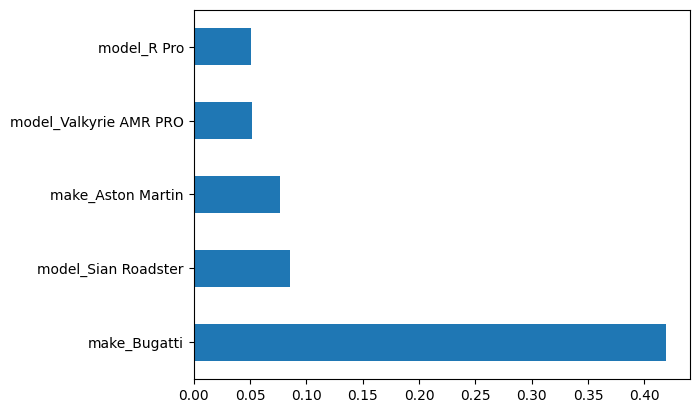

In [149]:
feat_importances = pd.Series(EXTRA_REG_TREE.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [150]:
y_pred_test_EXTRA_REG=EXTRA_REG_TREE.predict(x_test)
score_test_EXTRA_REG=r2_score(y_test,y_pred_test_EXTRA_REG)*100
print("score_test_EXTRA_REG for our test dataset with tuning is : {:.2f}%".format(score_test_EXTRA_REG))

score_test_EXTRA_REG for our test dataset with tuning is : 50.28%


#LOGISTIC_REGRESSION

In [156]:
LOG_REG = linear_model.LogisticRegression()

In [157]:
LOG_REG.fit(x_train,y_train)

LogisticRegression()

In [158]:
y_pred_test_LOG_REGC=LOG_REG.predict(x_test)
score_test_LOG_REG=r2_score(y_test,y_pred_test_LOG_REGC)*100
print("score_test_LOG_REG for our test dataset with tuning is : {:.2f}%".format(score_test_LOG_REG))

score_test_LOG_REG for our test dataset with tuning is : 47.19%


#FINAL_RESULTS_MODELS_SCORES_USING_MANY_ENCODING_PLOTTING

Text(0.5, 1.0, 'SCORE_REGRESSIONS_MODELS')

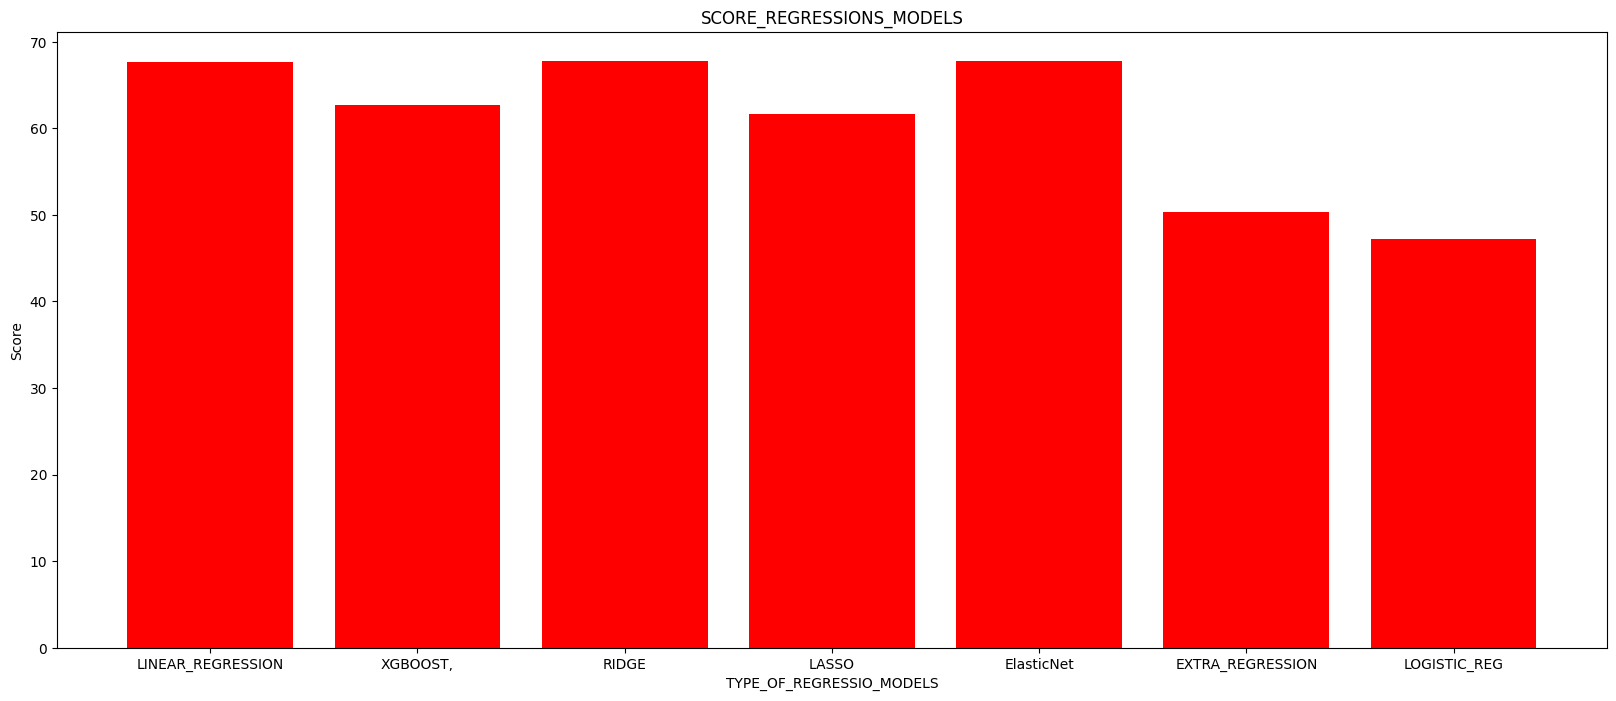

In [161]:
X= ["LINEAR_REGRESSION","XGBOOST,","RIDGE","LASSO","ElasticNet","EXTRA_REGRESSION","LOGISTIC_REG"]
Y=[score_test_L,score_test_XGB ,score_test_RIDGE,score_test_LASSO,score_test_ELASTIC_REG,score_test_EXTRA_REG,score_test_LOG_REG]
plt.figure(figsize=(20,8))
plt.bar(X , Y,color='RED')
plt.xlabel("TYPE_OF_REGRESSIO_MODELS")
plt.ylabel("Score")
plt.title("SCORE_REGRESSIONS_MODELS")

In [168]:
#Y=[score_test_L,score_test_XGB ,score_test_RIDGE,score_test_LASSO,score_test_ELASTIC_REG,score_test_EXTRA_REG,score_test_LOG_REG]
score_test_LOG_REG

47.19215021681325

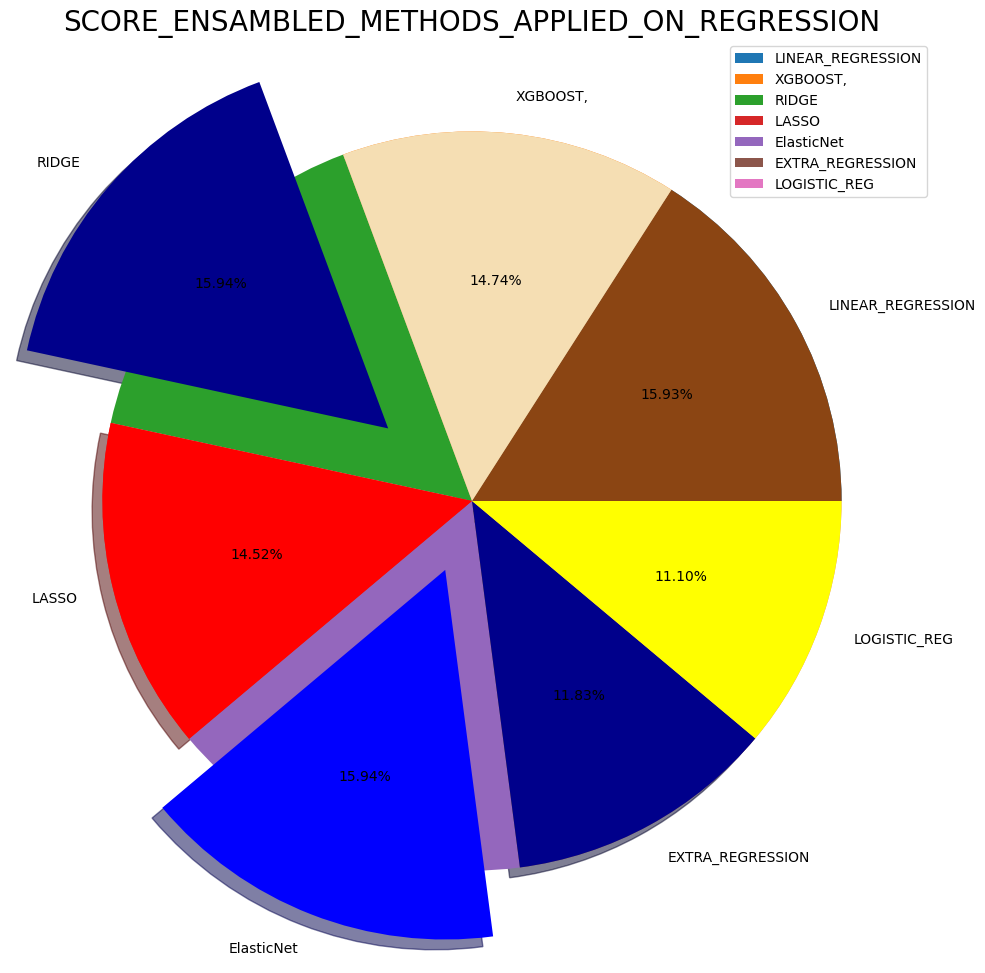

In [175]:
X= ["LINEAR_REGRESSION","XGBOOST,","RIDGE","LASSO","ElasticNet","EXTRA_REGRESSION","LOGISTIC_REG"]
DATA=[67.71329868892147,62.642507673177384,67.7662678445898,61.70471982989076,67.75811767850644,50.27554235053338,47.19215021681325]
colors = ['saddlebrown', 'wheat', 'darkblue',"red","blue","darkblue","yellow"]
EXPLOD = [0.0, 0.0, 0.3,0.0,0.2,0.0,0.0]
plt.figure(figsize=(80, 12))
plt.pie(DATA)
plt.title("SCORE_ENSAMBLED_METHODS_APPLIED_ON_REGRESSION", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()